## → Diccionario de Datos:

- ##### *Contenido_de_Nitrogeno:* Proporción de contenido de nitrógeno en el suelo.
- ##### *Contenido_de_Fosforo:* Proporción de contenido de fósforo en el suelo.
- ##### *Contenido_de_Potasio:* Proporción de contenido de potasio en el suelo.
- ##### *Temperatura_C:* Temperatura en grados Celsius.
- ##### *Humedad_Relativa:* Humedad relativa en porcentaje.
- ##### *Nivel_de_pH:* Nivel de pH del suelo.
- ##### *Precipitacion_mm:* Cantidad de precipitación en milímetros.
- ##### *Tipo_de_Cultivo:* Tipo de cultivo recomendado en función de los parámetros anteriores.


#### El uso de Machine Learning en la agricultura es vital para optimizar rendimientos, mejorar la sostenibilidad y minimizar riesgos. Esto es particularmente relevante en Argentina, donde la agricultura es un pilar económico. Saber qué tipo de cultivo es más adecuado para ciertas condiciones del suelo y del clima puede tener un impacto significativo en la productividad y la sostenibilidad.

## → a. Análisis Exploratorio de Datos (EDA)
#### Para realizar un EDA exhaustivo del dataset, considere las siguientes preguntas:
#### ¿Cómo se distribuyen los valores en cada una de las variables?
#### ¿Existen correlaciones entre las diferentes variables del suelo y los tipos de cultivos?
#### ¿Cómo varía la recomendación de cultivo según las condiciones del suelo y el clima?
#### ¿Existen valores atípicos o faltantes que deban ser tratados?

## → b. Machine Learning

#### En esta sección, implementaremos dos modelos de Machine Learning para predecir el Tipo_de_Cultivo basándonos en las variables del suelo y del clima. Utilizaremos una Regresión Logística y un Árbol de Decisión. 

#### Consigna para la Implementación del Código: Utilice el siguiente código de Python como base para implementar el modelo de Árbol de Decisión:

```python
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
# Crear el modelo
decision_tree_model = DecisionTreeClassifier(criterion="entropy", random_state=2,
max_depth=5)
# Validación cruzada
score = cross_val_score(decision_tree_model, features, target, cv=5)
print('Puntuación de validación cruzada:', score)
# Precisión en entrenamiento
dt_train_accuracy = decision_tree_model.score(x_train, y_train)
print("Precisión en entrenamiento =", dt_train_accuracy)
# Precisión en pruebas
dt_test_accuracy = decision_tree_model.score(x_test, y_test)
print("Precisión en pruebas =", dt_test_accuracy)
# Matriz de confusión
y_pred = decision_tree_model.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm_dt = confusion_matrix(y_true, y_pred)
# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_dt, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()
```


#### Interprete que significa la diagonal y los desvios de la diagonal. Cual cultivo se confunde mas el algoritmo?


___

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [59]:
df_cultivos= pd.read_csv("/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/tp_datos/4-cultivo/tipo_cultivo.csv")
df_cultivos.head()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [60]:
df_cultivos = df_cultivos.copy()

In [61]:
df_cultivos.columns

Index(['Unnamed: 0', 'Contenido_de_Nitrogeno', 'Contenido_de_Fosforo',
       'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa',
       'Nivel_de_pH', 'Precipitacion_mm', 'Tipo_de_Cultivo'],
      dtype='object')

___

## ***a. Análisis Exploratorio de Datos (EDA)***
#### Para realizar un EDA exhaustivo del dataset, considere las siguientes preguntas:
#### ¿Cómo se distribuyen los valores en cada una de las variables?
#### ¿Existen correlaciones entre las diferentes variables del suelo y los tipos de cultivos?
#### ¿Cómo varía la recomendación de cultivo según las condiciones del suelo y el clima?
#### ¿Existen valores atípicos o faltantes que deban ser tratados?

## → Validación de la data

In [62]:
df_cultivos.rename(columns=lambda x: x.strip(), inplace=True) # Remuevo espacios de las columnas.

In [63]:
print("El dataset tiene " + str(df_cultivos.shape[0])+ " filas.")
print("El dataset tiene " + str(df_cultivos.shape[1])+ " columnas.")

El dataset tiene 2200 filas.
El dataset tiene 9 columnas.


In [64]:
from funciones.exploratory_data_analysis import validate_columns 
validate_columns(df_cultivos)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
Unnamed: 0,NaN,2200.0,0,0.0,"[4, 974, 1981, 1154, 756]"
Contenido_de_Nitrogeno,NaN,2200.0,0,0.0,"[78, 15, 121, 36, 43]"
Contenido_de_Fosforo,NaN,2200.0,0,0.0,"[42, 6, 53, 26, 68]"
Contenido_de_Potasio,NaN,2200.0,0,0.0,"[42, 41, 19, 26, 20]"
Temperatura_C,NaN,2200.0,0,0.0,"[20.13017482, 19.0087067, 23.51308653, 30.1729..."
Humedad_Relativa,NaN,2200.0,0,0.0,"[81.60487287, 88.83768149, 76.72621429, 51.084..."
Nivel_de_pH,NaN,2200.0,0,0.0,"[7.628472891, 6.8973684770000006, 7.9768894979..."
Precipitacion_mm,NaN,2200.0,0,0.0,"[262.7173405, 108.6793978, 80.11272117, 95.234..."
Tipo_de_Cultivo,22,2200,0,0.0,"[rice, pomegranate, cotton, mango, blackgram]"


In [65]:
df_cultivos.describe()

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,1099.500000,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,635.229617,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,549.750000,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,1099.500000,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,1649.250000,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,2199.000000,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


___

## →  Veo los tipos de datos con dtypes

In [66]:
df_cultivos.dtypes

Unnamed: 0                  int64
Contenido_de_Nitrogeno      int64
Contenido_de_Fosforo        int64
Contenido_de_Potasio        int64
Temperatura_C             float64
Humedad_Relativa          float64
Nivel_de_pH               float64
Precipitacion_mm          float64
Tipo_de_Cultivo            object
dtype: object

___

## → Valores outliers

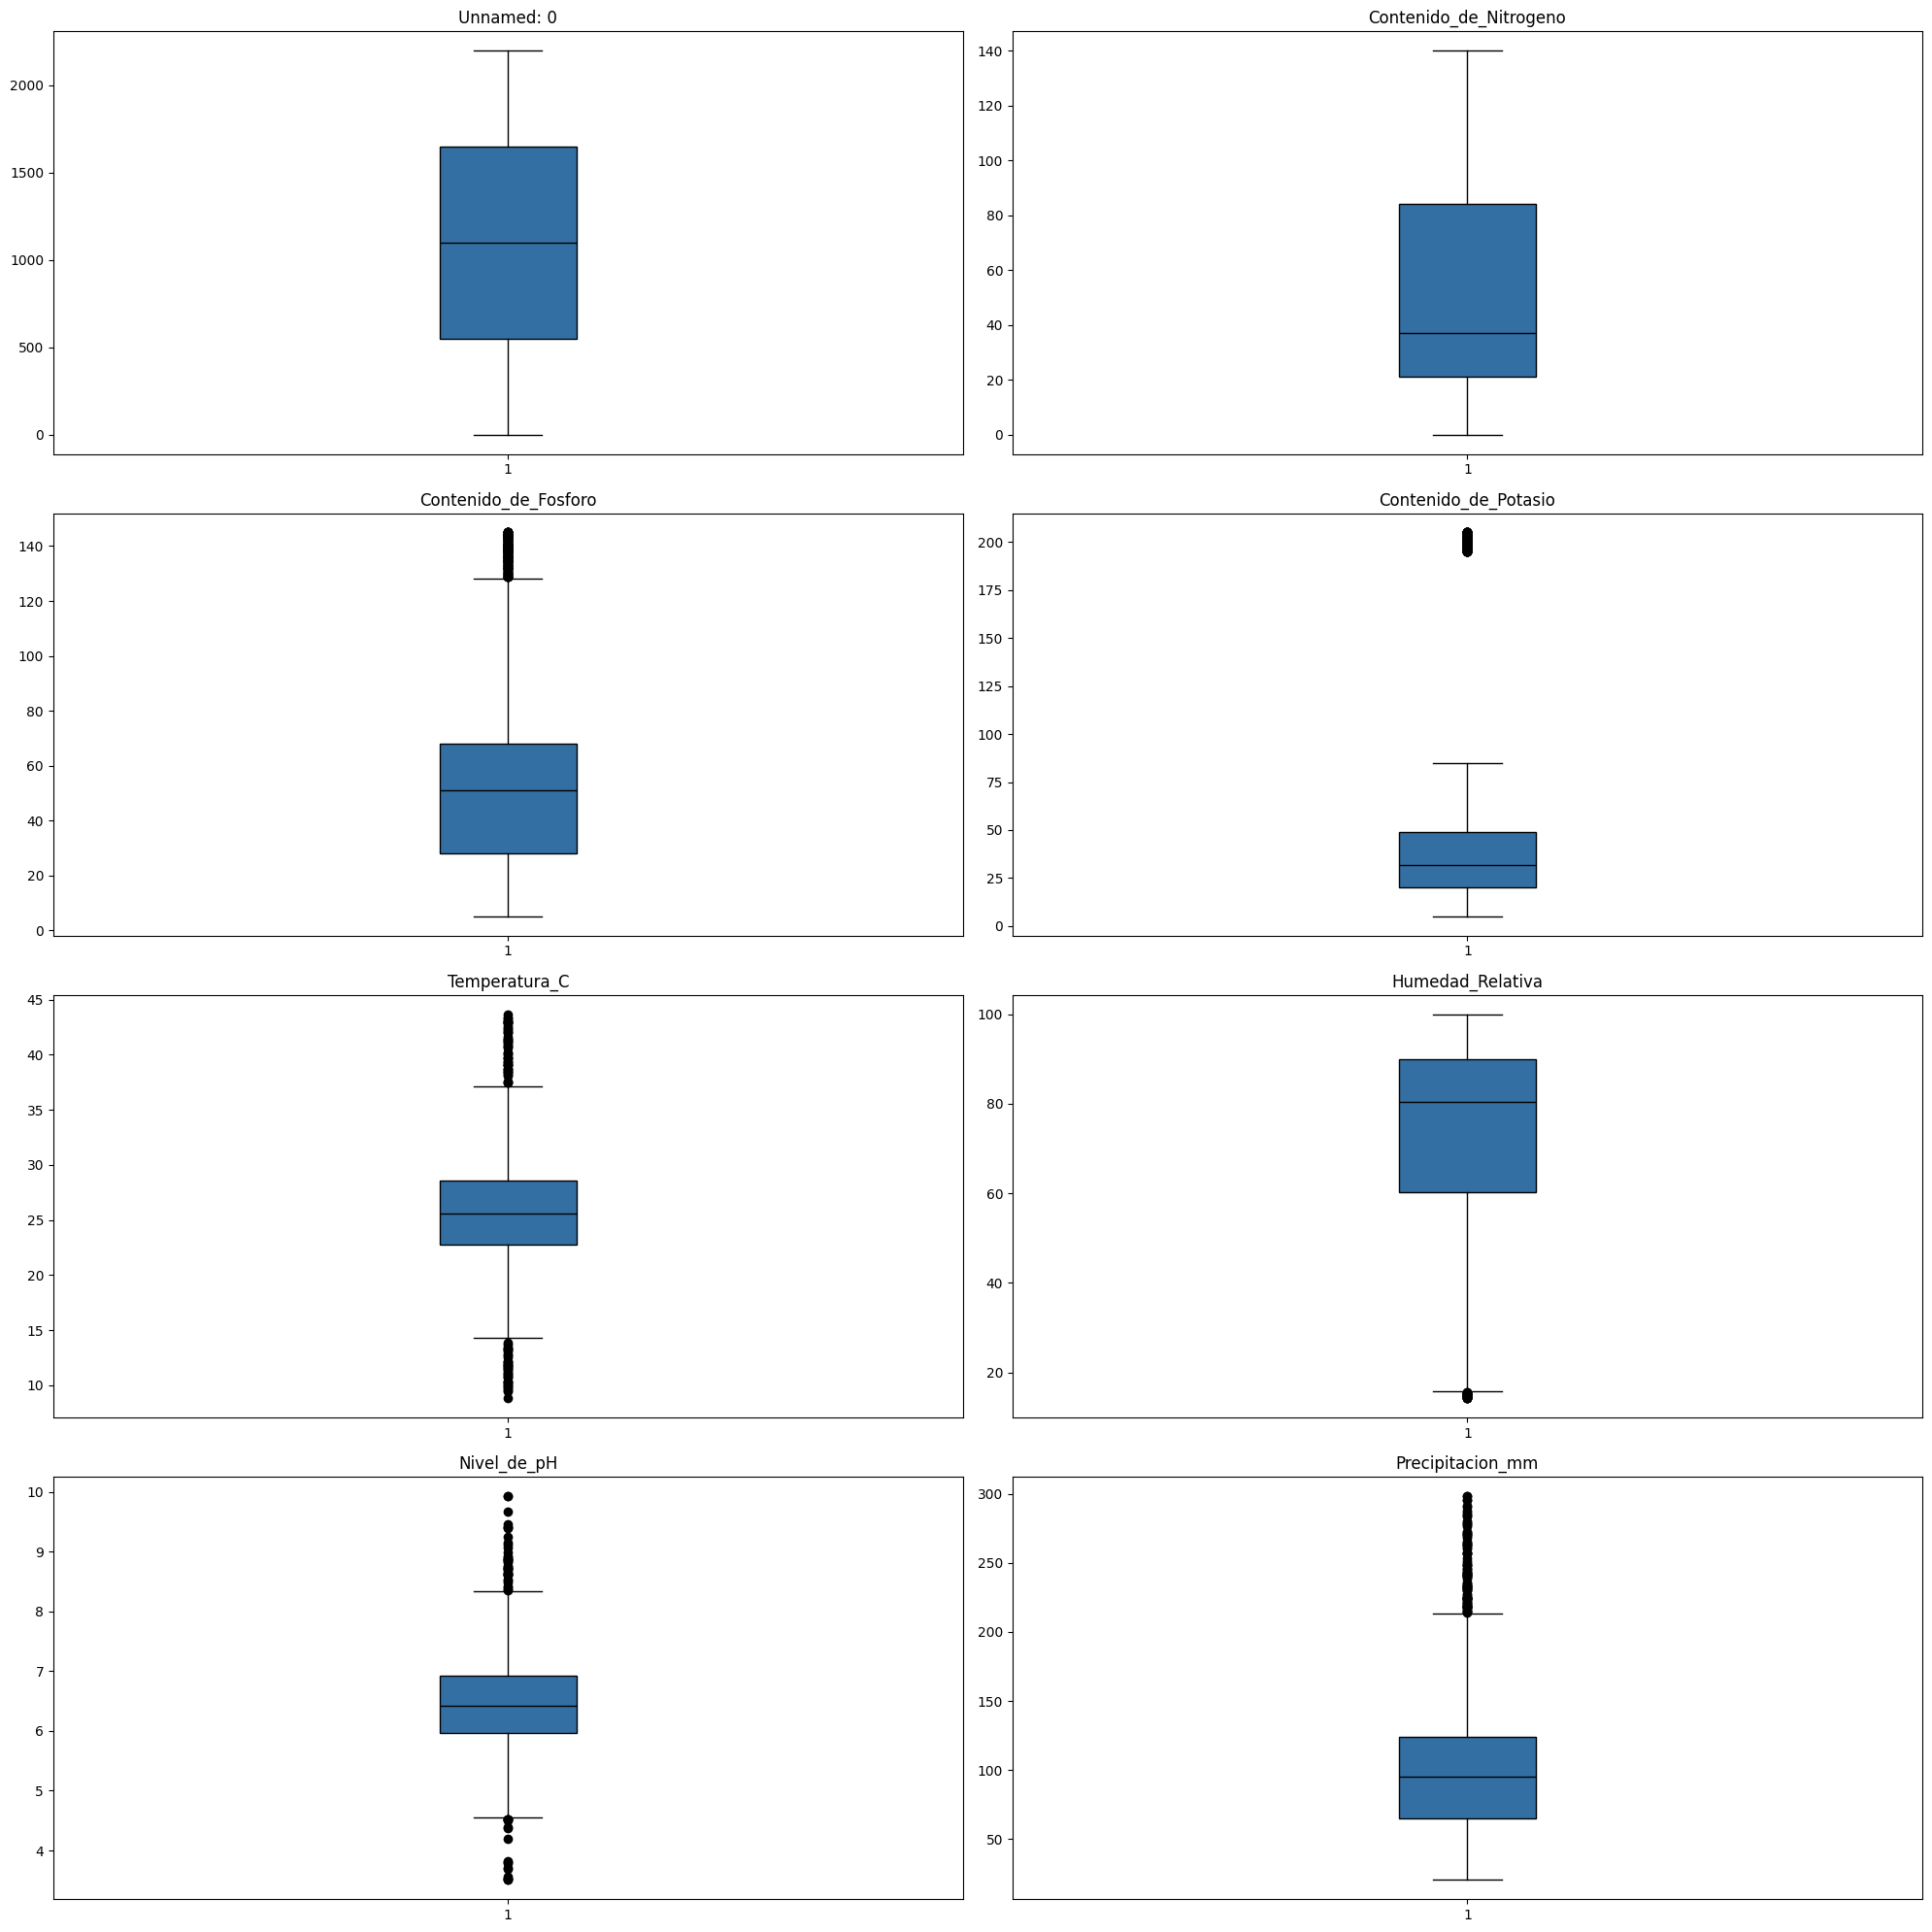

In [67]:
from funciones.exploratory_data_analysis import plot_outliers
plot_outliers(df_cultivos)

### Podemos concluir que, en este caso, no es necesario realizar un tratamiento específico de outliers en el dataset de cultivos, ya que los valores extremos pueden ser explicados por las variaciones naturales en las condiciones del suelo y del clima. Además las variables pueden ir cambiando en el tiempo y en base al cultivo que se este realizando.

In [68]:
"""
from funciones.exploratory_data_analysis import is_outlier

outliers_fosforo = is_outlier(df_cultivos["Contenido_de_Fosforo"], 1.5)
outlier_values_fosforo = df_cultivos["Contenido_de_Fosforo"][outliers_fosforo]

outliers_potasio = is_outlier(df_cultivos["Contenido_de_Potasio"], 1.5)
outlier_values_potasio = df_cultivos["Contenido_de_Potasio"][outliers_potasio]

outliers_temperatura = is_outlier(df_cultivos["Temperatura_C"], 1.5)
outlier_values_temperatura= df_cultivos["Temperatura_C"][outliers_temperatura]

outliers_humedad = is_outlier(df_cultivos["Humedad_Relativa"], 1.5)
outlier_values_humedad= df_cultivos["Humedad_Relativa"][outliers_humedad]

outliers_nivel_ph = is_outlier(df_cultivos["Nivel_de_pH"], 1.5)
outlier_values_nivel_ph = df_cultivos["Nivel_de_pH"][outliers_nivel_ph]

outliers_precipitacion = is_outlier(df_cultivos["Precipitacion_mm"], 1.5)
outlier_values_precipitacion = df_cultivos["Precipitacion_mm"][outliers_precipitacion]


print("Outliers de Contenido_de_Fosforo:")
print(outlier_values_fosforo)
print("")
print("Outliers de Contenido_de_Potasio:")
print(outlier_values_potasio)
print("")
print("Outliers de Temperatura_C:")
print(outlier_values_temperatura)
print("")
print("Outliers de Humedad_Relativa:")
print(outlier_values_humedad)
print("")
print("Outliers de Nivel_de_pH:")
print(outlier_values_nivel_ph)
print("")
print("Outliers de Precipitacion_mm:")
print(outlier_values_precipitacion)
"""

'\nfrom funciones.exploratory_data_analysis import is_outlier\n\noutliers_fosforo = is_outlier(df_cultivos["Contenido_de_Fosforo"], 1.5)\noutlier_values_fosforo = df_cultivos["Contenido_de_Fosforo"][outliers_fosforo]\n\noutliers_potasio = is_outlier(df_cultivos["Contenido_de_Potasio"], 1.5)\noutlier_values_potasio = df_cultivos["Contenido_de_Potasio"][outliers_potasio]\n\noutliers_temperatura = is_outlier(df_cultivos["Temperatura_C"], 1.5)\noutlier_values_temperatura= df_cultivos["Temperatura_C"][outliers_temperatura]\n\noutliers_humedad = is_outlier(df_cultivos["Humedad_Relativa"], 1.5)\noutlier_values_humedad= df_cultivos["Humedad_Relativa"][outliers_humedad]\n\noutliers_nivel_ph = is_outlier(df_cultivos["Nivel_de_pH"], 1.5)\noutlier_values_nivel_ph = df_cultivos["Nivel_de_pH"][outliers_nivel_ph]\n\noutliers_precipitacion = is_outlier(df_cultivos["Precipitacion_mm"], 1.5)\noutlier_values_precipitacion = df_cultivos["Precipitacion_mm"][outliers_precipitacion]\n\n\nprint("Outliers de C

In [69]:
df_cultivos.groupby("Tipo_de_Cultivo").agg({
    "Contenido_de_Fosforo": "mean",
    "Contenido_de_Potasio": "mean",
    "Temperatura_C": "mean"
}).sort_values(by="Contenido_de_Fosforo", ascending=False).reset_index()

,Tipo_de_Cultivo,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C
0,apple,134.22,199.89,22.630942
1,grapes,132.53,200.11,23.849575
2,banana,82.01,50.05,27.376798
3,lentil,68.36,19.41,24.509052
4,chickpea,67.79,79.92,18.872847
5,pigeonpeas,67.73,20.29,27.741762
6,kidneybeans,67.54,20.05,20.115085
7,blackgram,67.47,19.24,29.973340
8,papaya,59.05,50.04,33.723859
9,maize,48.44,19.79,22.389204


In [70]:
'''
from funciones.machine_learning import crear_heatmap_correlacion
crear_heatmap_correlacion(df_cultivos)
'''

'\nfrom funciones.machine_learning import crear_heatmap_correlacion\ncrear_heatmap_correlacion(df_cultivos)\n'

___

## → Correlaciones entre las variables del suelo y los tipos de cultivos

In [71]:
from sklearn.preprocessing import OneHotEncoder
df_cultivos_ohe = OneHotEncoder(sparse=False)
df_cultivos_ohe.fit(df_cultivos[['Tipo_de_Cultivo']])
df_cultivos_ohe.categories_

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


[array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
        'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
        'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
        'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)]

In [72]:
df_cultivos["apple"], df_cultivos["banana"], df_cultivos["blackgram"], df_cultivos["chickpea"], df_cultivos["coconut"], df_cultivos["coffee"], df_cultivos["cotton"], df_cultivos["grapes"], df_cultivos["jute"], df_cultivos["kidneybeans"], df_cultivos["lentil"], df_cultivos["maize"], df_cultivos["mango"], df_cultivos["mothbeans"], df_cultivos["mungbean"], df_cultivos["muskmelon"], df_cultivos["orange"], df_cultivos["papaya"], df_cultivos["pigeonpeas"], df_cultivos["pomegranate"], df_cultivos["rice"], df_cultivos["watermelon"] = df_cultivos_ohe.transform(df_cultivos[['Tipo_de_Cultivo']]).T

df_cultivos.head()

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,Tipo_de_Cultivo,apple,...,mango,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [73]:
df_cultivos.drop(columns=["Tipo_de_Cultivo"], inplace=True)

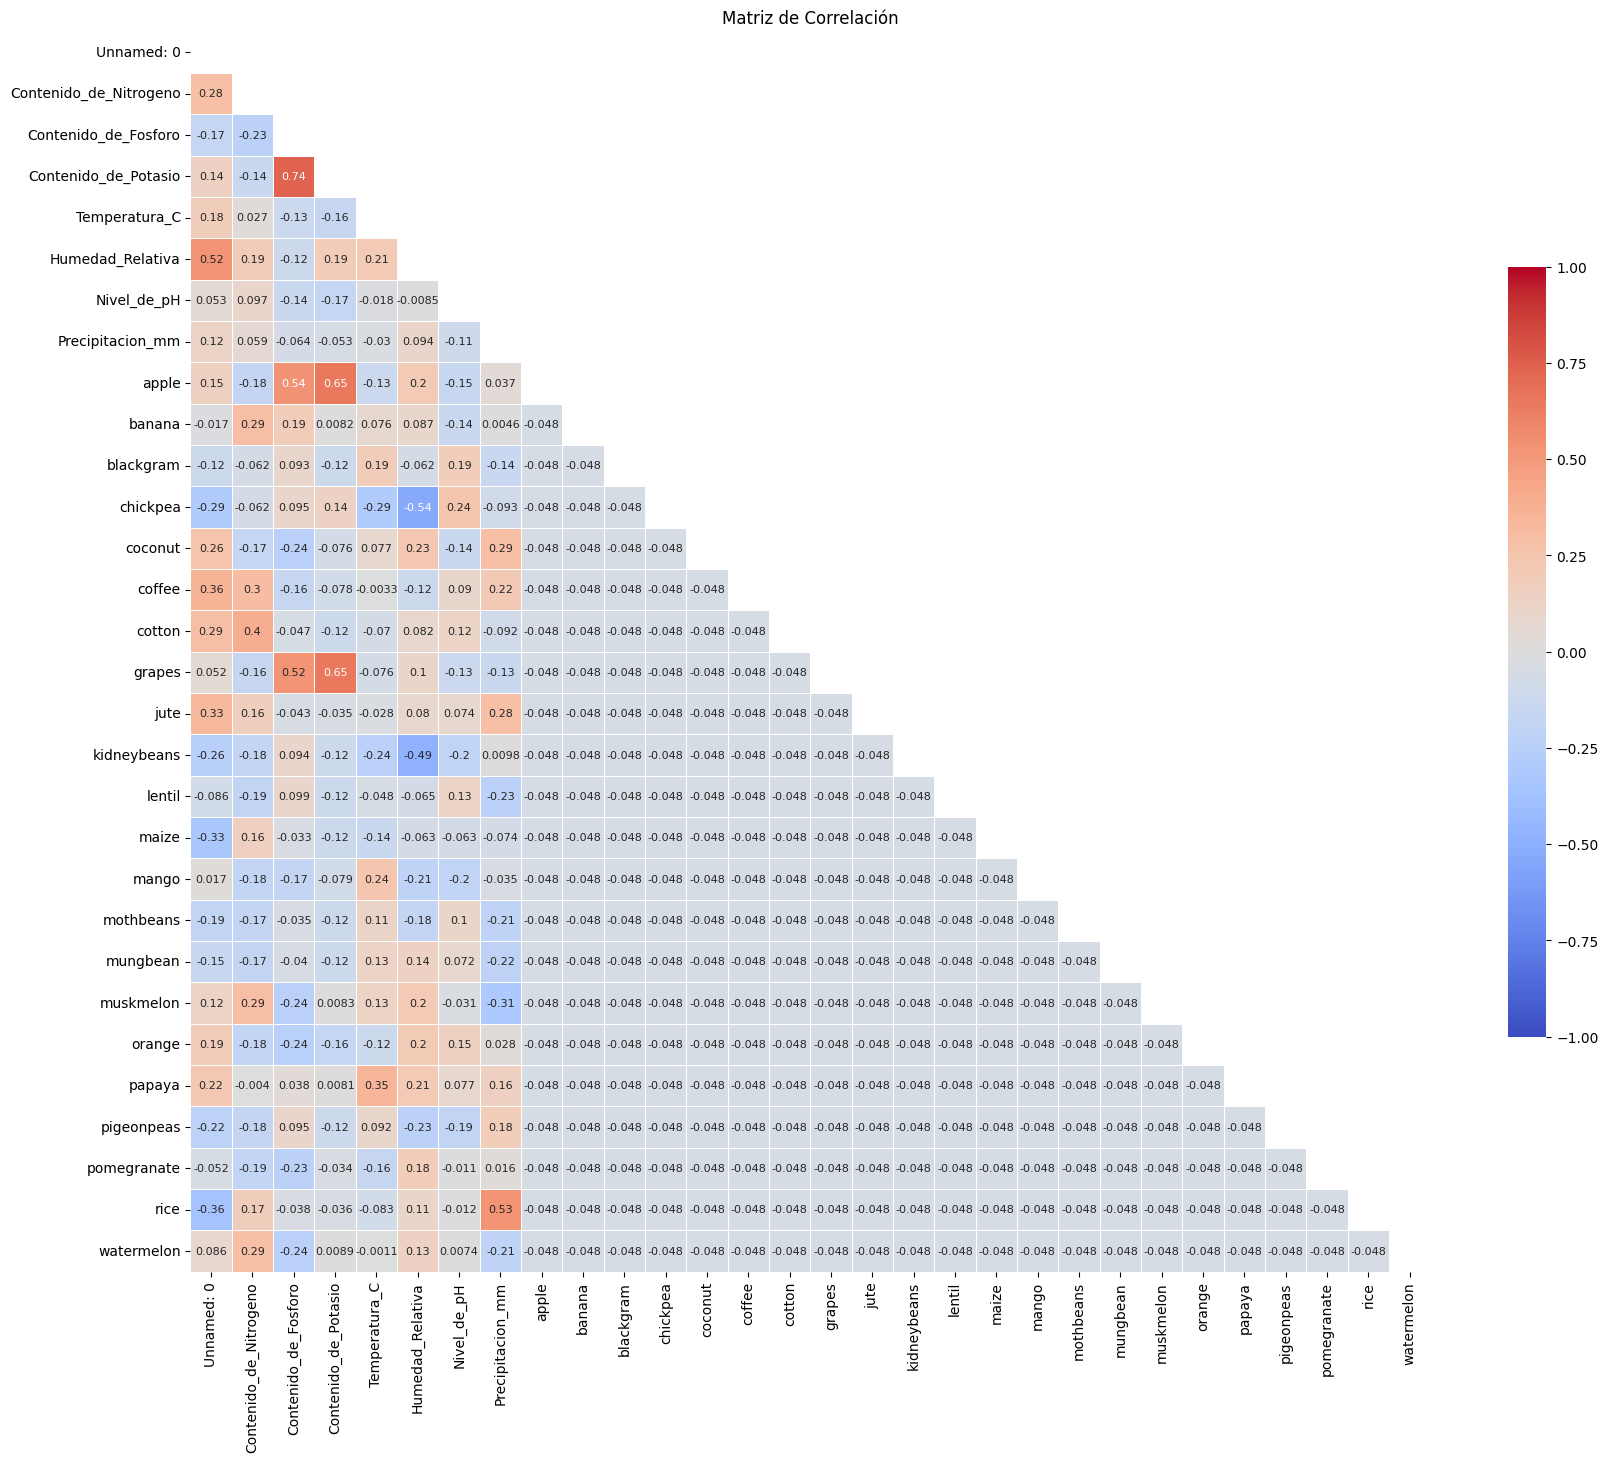

In [74]:
# data_encoded = pd.get_dummies(df_cultivos, columns=['Tipo_de_Cultivo'], drop_first=True)
correlation_matrix = df_cultivos.corr()
plt.figure(figsize=(20, 20))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmax=1, vmin=-1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 8})
plt.title('Matriz de Correlación')
plt.show()

(Se va a analizar cada variable del suelo y clima en base al tipo de cultivo; se tomarán solamente los cultivos representativos - correlacion > 0.2 para cada variable/cultivo)

### ***Contenido de Nitrogeno***
##### → "banana" tiene una correlacion moderada de 0.29 con "Contenido_de_Nitrogeno".
##### → "coffee" tiene una correlacion moderada de 0.3 con "Contenido_de_Nitrogeno".
##### → "cotton" tiene una correlacion moderada de 0.4 con "Contenido_de_Nitrogeno".
##### → "muskmelon" y "watermelon" tienen una correlacion moderada de 0.29 con "Contenido_de_Nitrogeno".

### ***Contenido de Fosforo***
##### → "grapes" tiene una correlacion fuerte de 0.52 con "Contenido_de_Fosforo".
##### → "apples" tiene una correlacion fuerte de 0.54 con "Contenido_de_Fosforo".

### ***Contenido de Potasio***
##### → "grapes" tiene una correlacion fuerte de 0.65 con "Contenido_de_Potasio".
##### → "apples" tiene una correlacion fuerte de 0.65 con "Contenido_de_Potasio".

### ***Temperatura_C***
##### → "mango" tiene una correlacion moderada de 0.24 con "Temperatura_C".
##### → "papaya" tiene una correlacion moderada de 0.35 con "Temperatura_C".

### ***Humedad_Relativa***
##### → "coconut" tiene una correlacion moderada de 0.23 con "Humedad_Relativa".
##### → "muskmelon" y "orange" tieneb una correlacion moderada de 0.2 con "Humedad_Relativa".
##### → "_papaya" tiene una correlacion moderada de 0.21 con "Humedad_Relativa".
##### →  "apple" tiene una correlacion moderada de 0.2 con "Humedad_Relativa".

### ***Nivel_de_pH***
#### → "chickpea" tiene una correlacion moderada de 0.24 con "Nivel_de_pH".

### ***Precipitacion_mm***
##### → "coconut" tiene una correlacion moderada de 0.29 con "Precipitacion_mm".
##### → "coffee" tiene una correlacion moderada de 0.22 con "Precipitacion_mm".
##### → "jute" tiene una correlacion moderada de 0.28 con "Precipitacion_mm".
##### → "rice" tiene una correlacion moderada de 0.53 con "Precipitacion_mm".


##### Es importante tener en cuenta que la correlación no implica causalidad, es decir, solo porque dos variables están correlacionadas entre sí no significa que una variable cause la otra. Por lo tanto, es necesario realizar un análisis más detallado para determinar las relaciones causales entre las variables.

___

## → Recomendación de cultivo según condiciones del suelo y el clima

### Según condiciones del suelo:

In [76]:
cultivos = ['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
            'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
            'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
            'pigeonpeas', 'pomegranate', 'rice', 'watermelon']

df_cultivos['Tipo_de_Cultivo'] = df_cultivos[cultivos].idxmax(axis=1)

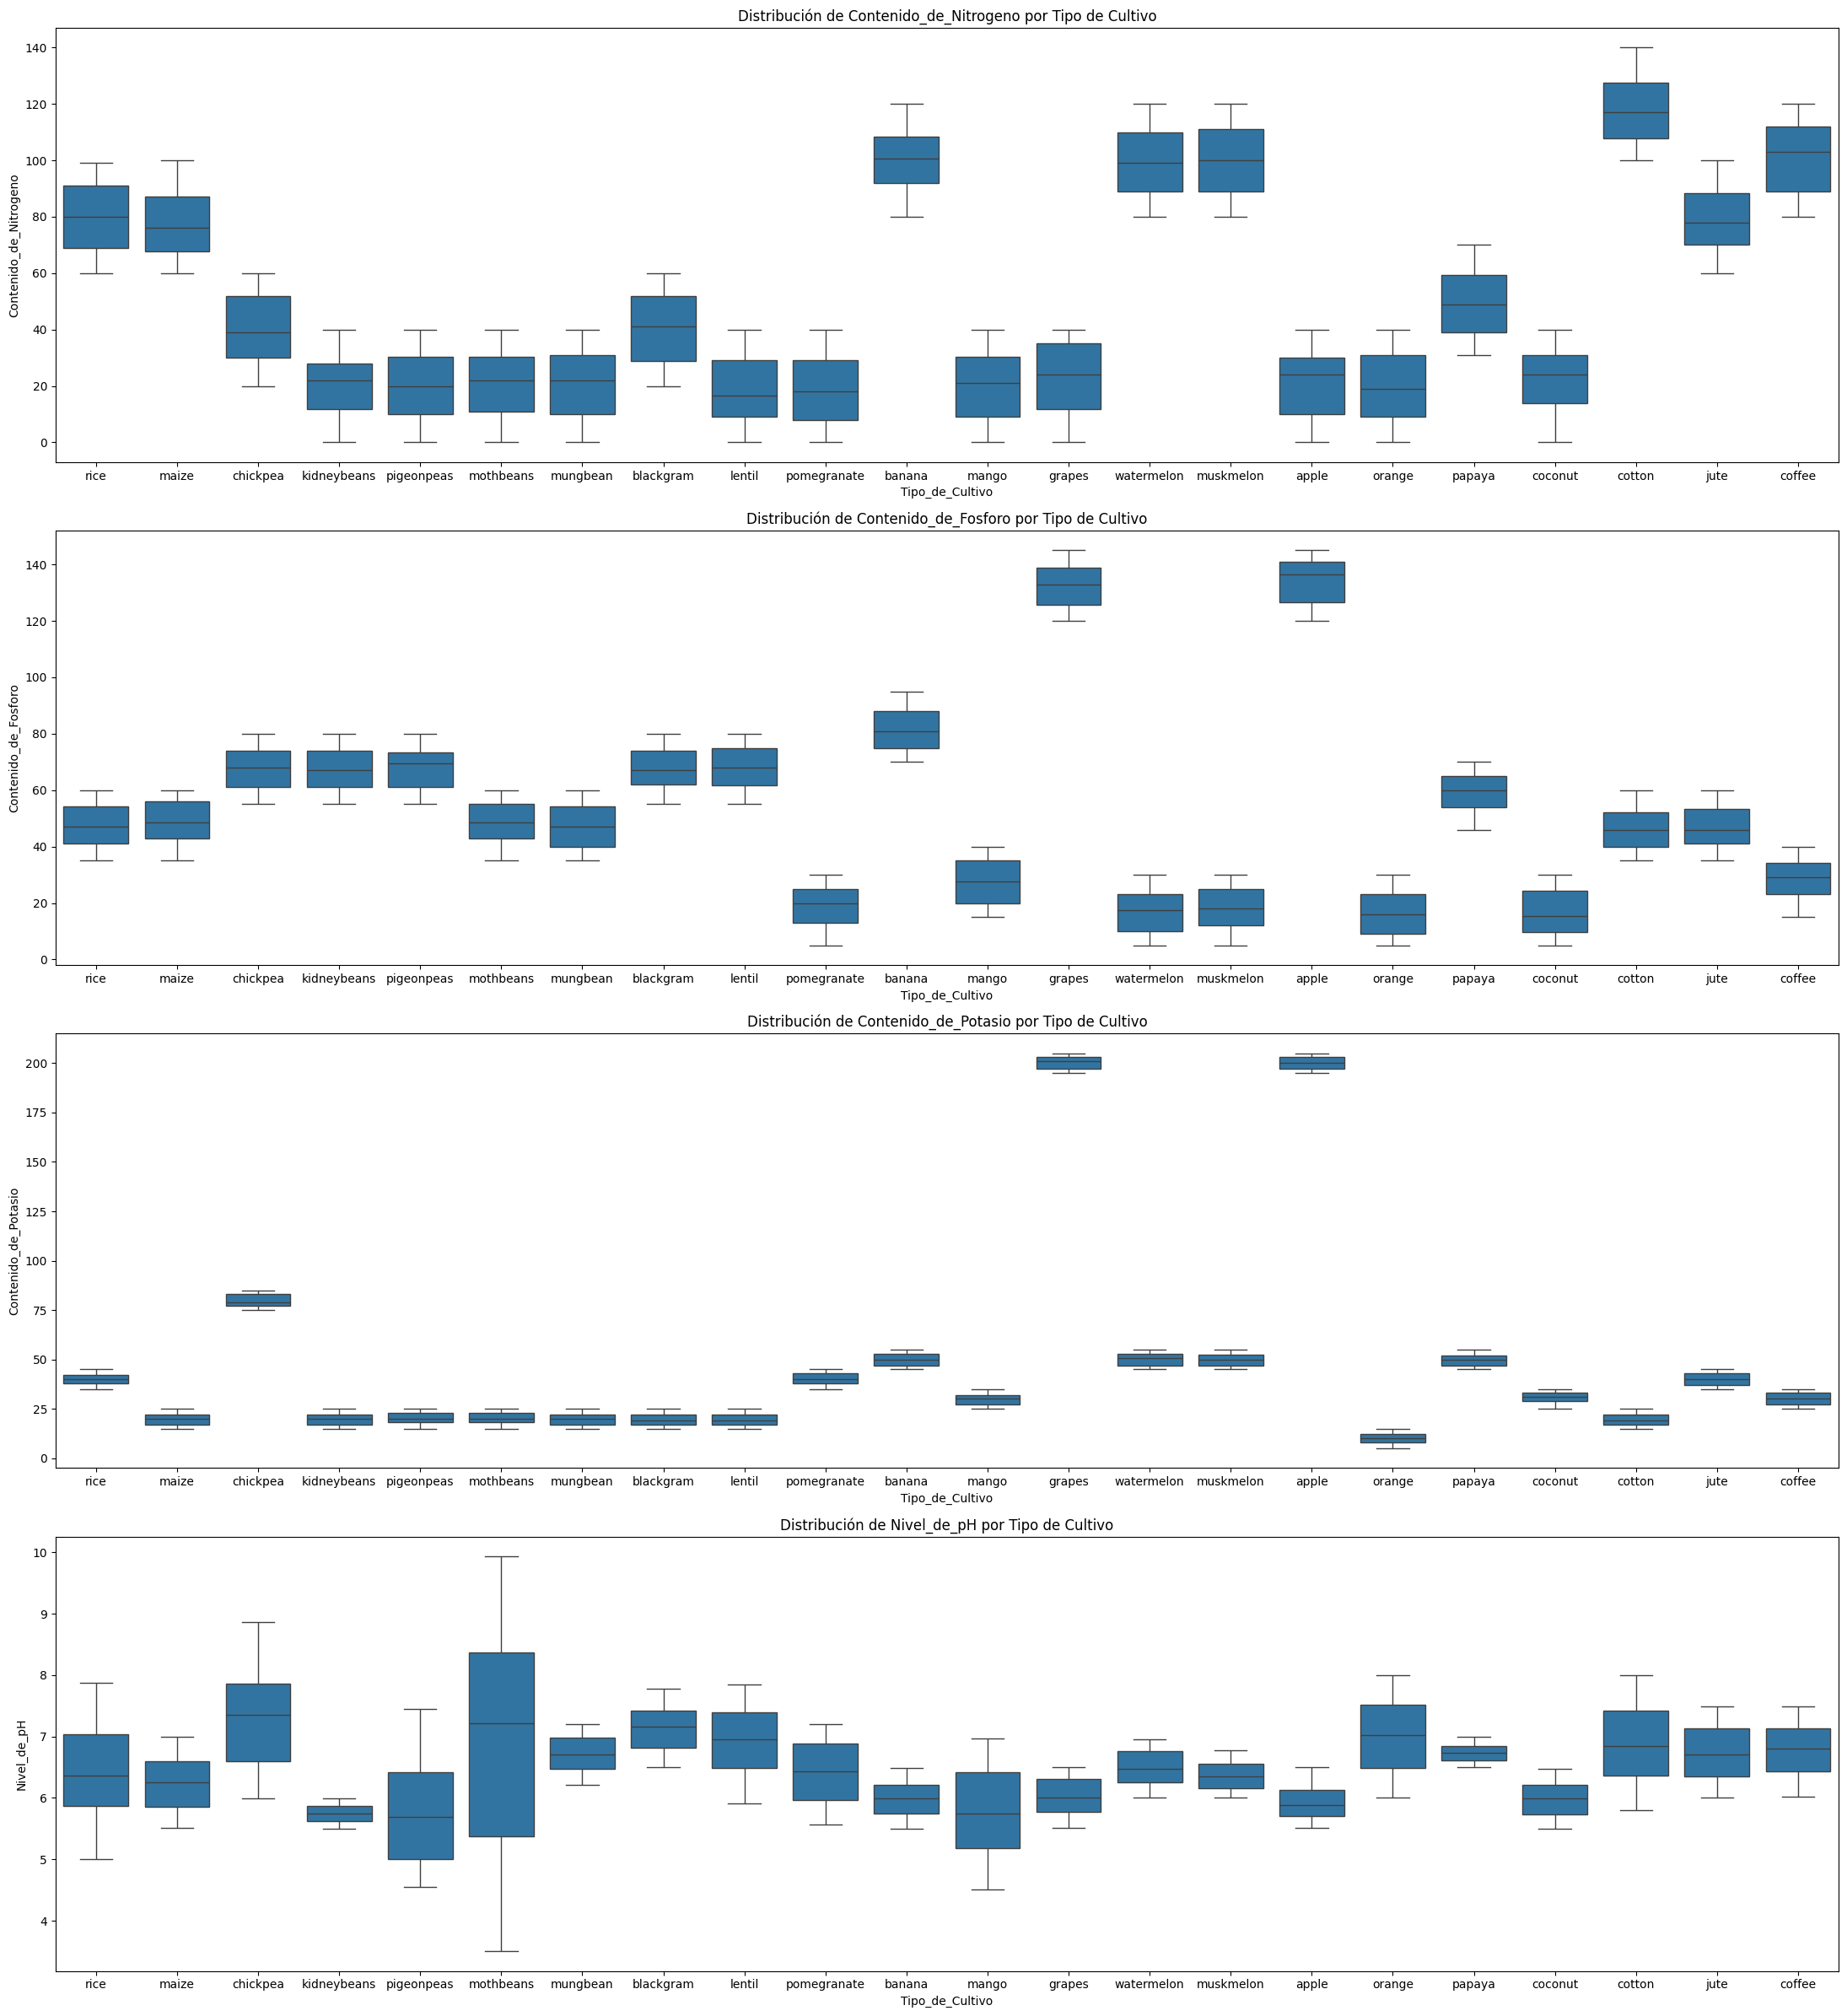

In [77]:
suelo_variables = ['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo', 'Contenido_de_Potasio', 'Nivel_de_pH']

plt.figure(figsize=(22, 24))
for i, variable in enumerate(suelo_variables, 1):
    plt.subplot(4, 1, i)
    sns.boxplot(x='Tipo_de_Cultivo', y=variable, data=df_cultivos)
    plt.title(f'Distribución de {variable} por Tipo de Cultivo')

plt.tight_layout()
plt.show()

### ***Variación por Contenido de Nitrogeno***
##### → "cotton" es el tipo de cultivo que requiere de más contenido de nitrógeno. Esto se debe a que el algodón es una planta que requiere de mucho nitrógeno para su crecimiento y desarrollo, ya que es un componente esencial de las proteínas, las cuales son necesarias para la formación de las células vegetales.

### ***Variación por Contenido de Fosforo***
##### → "grapes" y "apples" son los tipos de cultivo que requieren de más contenido de fósforo. Esto se debe a que el fósforo es un nutriente esencial para el crecimiento de las plantas, ya que es un componente de los ácidos nucleicos, los fosfolípidos y la molécula de energía ATP.

### ***Variación por Contenido de Potasio***
##### → "grapes" y "apples" son los tipos de cultivo que requieren de más contenido de potasio. Esto se debe a que el potasio es un nutriente esencial, al igual que el fosforo, para el crecimiento de las plantas, ya que es un componente de los ácidos nucleicos, los fosfolípidos y la molécula de energía ATP.    

### ***Variación por Nivel de pH***
.


### Según condiciones del clima:

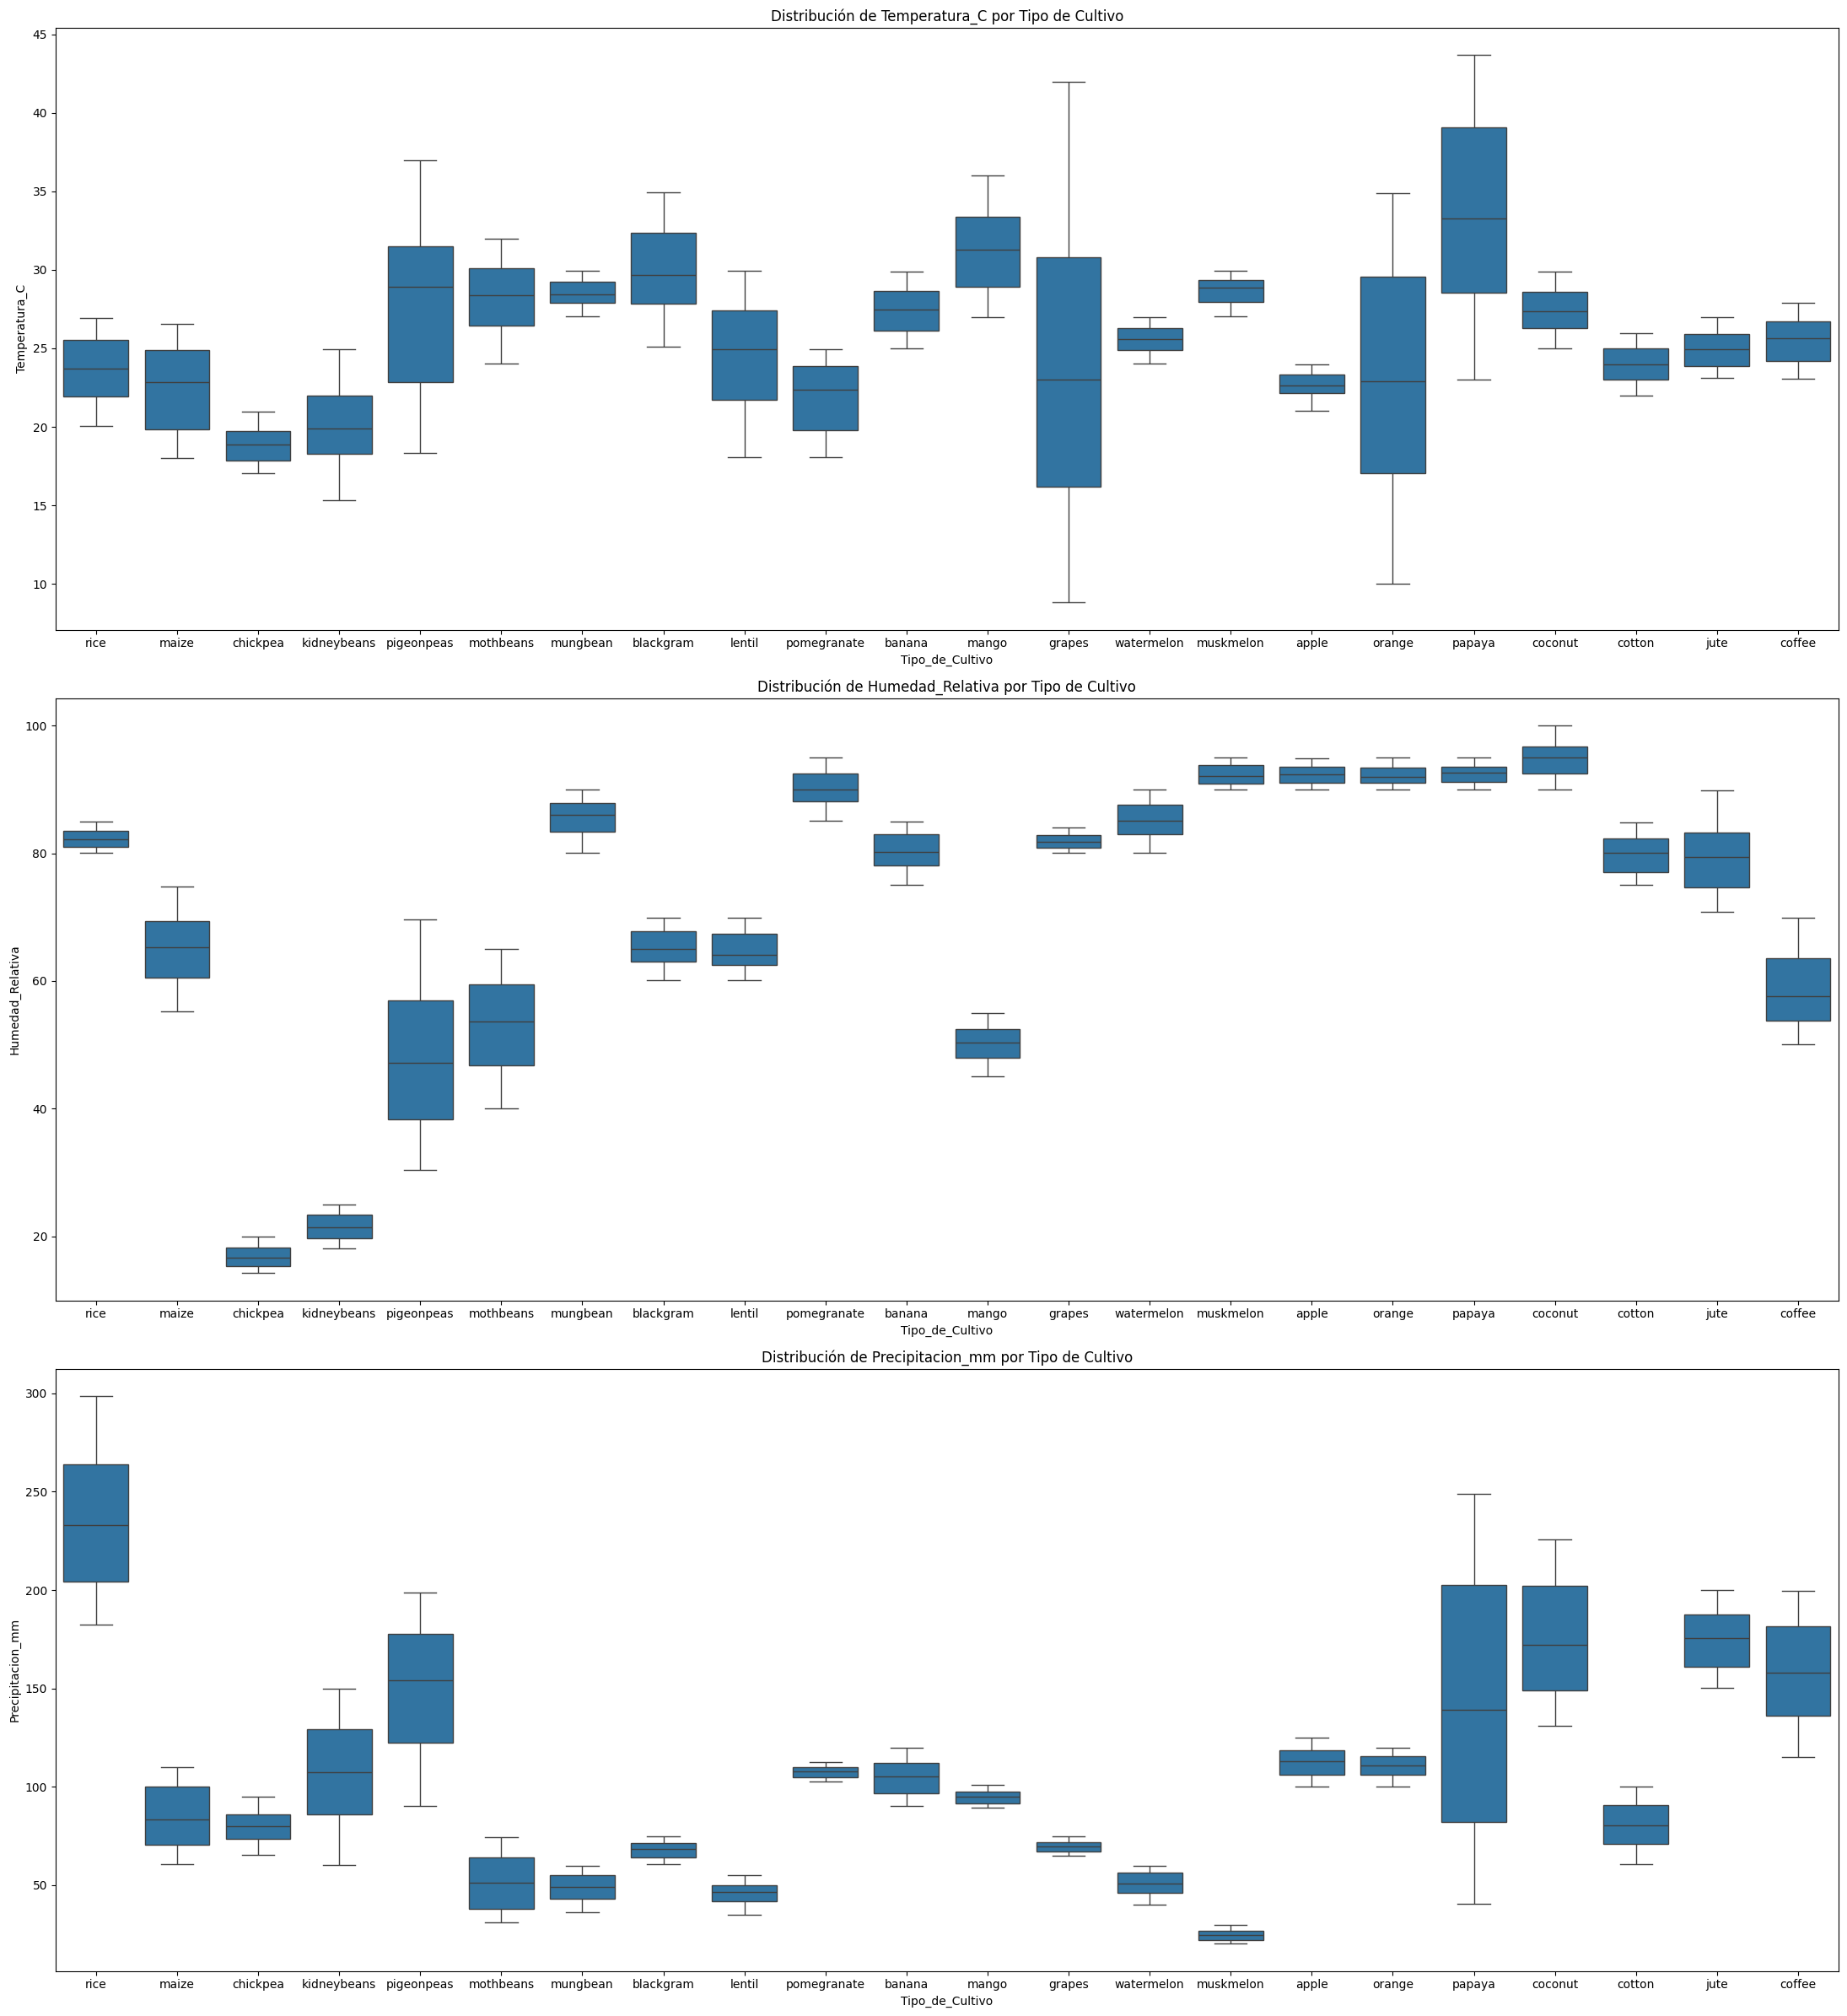

In [78]:
clima_variables = ['Temperatura_C', 'Humedad_Relativa', 'Precipitacion_mm']

plt.figure(figsize=(22, 24))
for i, variable in enumerate(clima_variables, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='Tipo_de_Cultivo', y=variable, data=df_cultivos)
    plt.title(f'Distribución de {variable} por Tipo de Cultivo')

plt.tight_layout()
plt.show()


### ***Variación por Temperatura_C***
##### → "papaya" es el tipo de cultivo que requiere de más temperatura. Esto es así porque la papaya es una planta tropical que requiere de temperaturas cálidas para su crecimiento y desarrollo. 

### ***Variación por Humedad Relativa***
##### → "coconut" es el tipo de cultivo que requiere de más humedad relativa. Esto se debe a que el coco es una planta tropical que requiere de mucha humedad para su crecimiento y desarrollo. 

### ***Variación por Precipitacion mm***
##### → "rice" es el tipo de cultivo que requiere de más precipitación. Esto se debe a que el arroz es una planta que requiere de mucha agua para su crecimiento y desarrollo. Además, el arroz es un cultivo que se desarrolla en zonas de clima tropical y subtropical, donde las precipitaciones son abundantes.

___

## ***b. Machine Learning***

### Regresión Logística

In [79]:
df_cultivos

,Unnamed: 0,Contenido_de_Nitrogeno,Contenido_de_Fosforo,Contenido_de_Potasio,Temperatura_C,Humedad_Relativa,Nivel_de_pH,Precipitacion_mm,apple,banana,...,mothbeans,mungbean,muskmelon,orange,papaya,pigeonpeas,pomegranate,rice,watermelon,Tipo_de_Cultivo
0,0,90,42,43,20.879744,82.002744,6.502985,202.935536,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,rice
1,1,85,58,41,21.770462,80.319644,7.038096,226.655537,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,rice
2,2,60,55,44,23.004459,82.320763,7.840207,263.964248,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,rice
3,3,74,35,40,26.491096,80.158363,6.980401,242.864034,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,rice
4,4,78,42,42,20.130175,81.604873,7.628473,262.717340,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,rice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,2195,107,34,32,26.774637,66.413269,6.780064,177.774507,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,coffee
2196,2196,99,15,27,27.417112,56.636362,6.086922,127.924610,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,coffee
2197,2197,118,33,30,24.131797,67.225123,6.362608,173.322839,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,coffee
2198,2198,117,32,34,26.272418,52.127394,6.758793,127.175293,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,coffee


In [80]:
'''
from sklearn import preprocessing

# Función para encodear

def encoder(df, cat):

    le = preprocessing.LabelEncoder()

    clases = []

    for i in cat:

        df[i]=le.fit_transform(df[i]) 

        clases.append(le.classes_)

    return df, clases

'''

'\nfrom sklearn import preprocessing\n\n# Función para encodear\n\ndef encoder(df, cat):\n\n    le = preprocessing.LabelEncoder()\n\n    clases = []\n\n    for i in cat:\n\n        df[i]=le.fit_transform(df[i]) \n\n        clases.append(le.classes_)\n\n    return df, clases\n\n'

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Codificar las categorías de cultivo como una única columna de etiquetas categóricas
le = LabelEncoder()
df_cultivos['Tipo_de_Cultivo'] = le.fit_transform(df_cultivos['Tipo_de_Cultivo'])

# Definir las variables independientes y la variable objetivo
X = df_cultivos[['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo', 'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa', 'Nivel_de_pH', 'Precipitacion_mm']]
y = df_cultivos['Tipo_de_Cultivo']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión logística
model = LogisticRegression(max_iter=1000)  # Aumentar max_iter si el modelo no converge

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir los tipos de cultivo para los datos de prueba
y_pred = model.predict(X_test)

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))


/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarn

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.81      0.85      0.83        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.80      0.94      0.86        17
           7       1.00      1.00      1.00        14
           8       0.87      0.87      0.87        23
           9       1.00      1.00      1.00        20
          10       0.77      0.91      0.83        11
          11       0.94      0.81      0.87        21
          12       1.00      1.00      1.00        19
          13       0.91      0.88      0.89        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       0.96    

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is depreca

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed 

Puntuación de validación cruzada: [0.97727273 0.96590909 0.97954545 0.96590909 0.97045455]


/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is depreca

---------------------------------------------------------
Precisión en entrenamiento = 0.9818181818181818
Precisión en pruebas = 0.9522727272727273


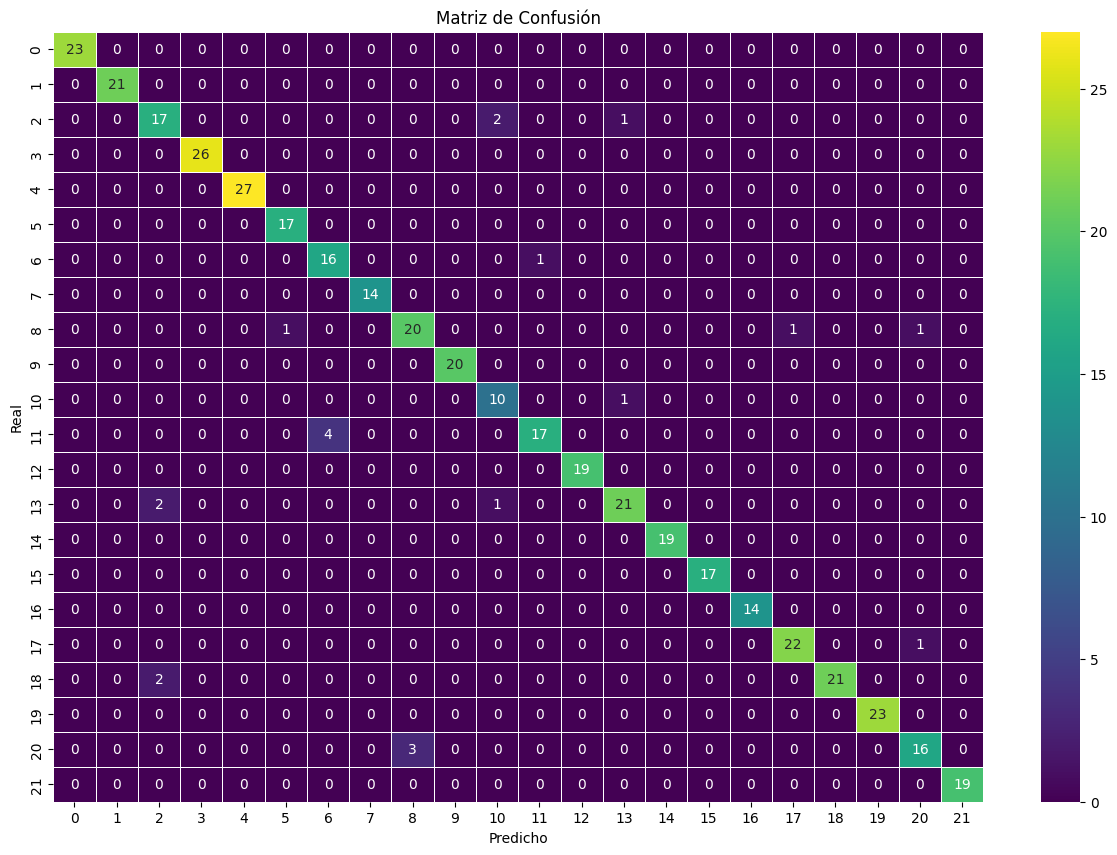

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Crear el modelo
logistic_model = LogisticRegression(max_iter=1000)
# Validación cruzada
score = cross_val_score(logistic_model, X, y, cv=5)
print('Puntuación de validación cruzada:', score)

# Entrenar el modelo
logistic_model.fit(X_train, y_train)

print("---------------------------------------------------------")
# Precisión en entrenamiento
log_train_accuracy = logistic_model.score(X_train, y_train)
print("Precisión en entrenamiento =", log_train_accuracy)

# Precisión en pruebas
log_test_accuracy = logistic_model.score(X_test, y_test)
print("Precisión en pruebas =", log_test_accuracy)

# Matriz de confusión
y_pred = logistic_model.predict(X_test)
cm_log = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm_log, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title('Matriz de Confusión')
plt.show()

#### La matriz de confusión es una tabla que se utiliza a menudo para describir el rendimiento de un modelo de clasificación.

- #### La diagonal de la matriz de confusión representa las predicciones correctas del modelo. Es decir, los casos en los que el cultivo real y el cultivo predicho son el mismo.

- #### Los desvíos de la diagonal representan las predicciones incorrectas. Es decir, los casos en los que el cultivo real y el cultivo predicho no son el mismo.


#### Por último, para determinar qué cultivo se confunde más a menudo, hay que buscar la fila (o columna) con la mayor cantidad de valores fuera de la diagonal. En este caso particular, la fila con la mayor cantidad de valores fuera de la diagonal es la columna 6, fila 11.

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix
import graphviz

In [84]:
# cultivos = pd.get_dummies(df_cultivos, columns=['Tipo_de_Cultivo'], drop_first=True)

In [85]:
X = df_cultivos[['Contenido_de_Nitrogeno', 'Contenido_de_Fosforo', 'Contenido_de_Potasio', 'Temperatura_C', 'Humedad_Relativa', 'Nivel_de_pH', 'Precipitacion_mm']]
y = df_cultivos['Tipo_de_Cultivo']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarn

DecisionTreeClassifier(max_depth=3, random_state=42)

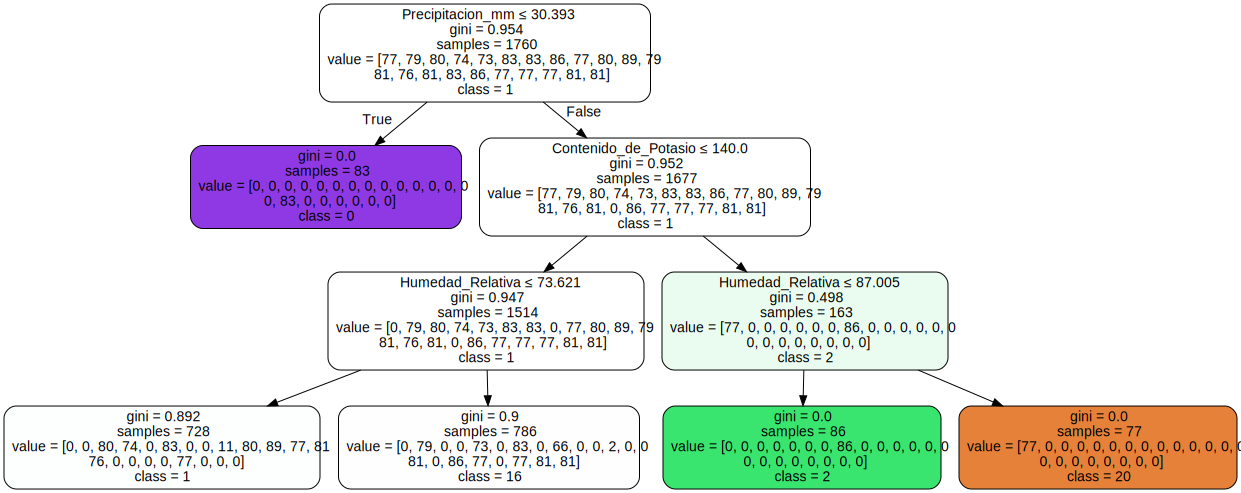

In [88]:
features = X.columns
targets = y.unique().astype(str)
data = export_graphviz(tree, out_file=None, feature_names=features, class_names=targets, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(data)
graph

In [89]:
graph.format = 'png'
graph.render(filename='tree_image', directory='./', cleanup=True)

'tree_image.png'